# Grad-CAM (Gradient-weighted Class Activation Mapping) 教學筆記

## 1. 什麼是 Grad-CAM?

Grad-CAM (Gradient-weighted Class Activation Mapping) 是一種用於解釋深度學習模型決策過程的可視化技術。它專注於卷積神經網絡（CNN），透過可視化模型對輸入圖像不同區域的關注點，幫助我們理解模型如何得出特定的預測。Grad-CAM 生成的“熱圖”會將模型最關注的區域高亮顯示，讓我們能夠直觀地看到模型在哪些區域做出了決策。

## 2. Grad-CAM 的工作原理

Grad-CAM 是基於 CNN 的特徵圖（feature maps）和梯度信息進行計算。具體來說，它會通過以下幾個步驟來生成可視化熱圖：

1. **前向傳播：** 輸入圖像傳遞給模型，經過多層卷積層和池化層，生成特徵圖。
2. **反向傳播：** 對於模型的輸出結果，計算相對於特徵圖的梯度。這些梯度用來衡量每個卷積層的輸出對於最終決策的重要性。
3. **權重計算：** 這些梯度被用作權重，與每個卷積層的特徵圖進行加權平均，生成“熱圖”。
4. **生成熱圖：** 熱圖展示了模型對每個圖像區域的關注程度。顏色越熱的區域代表模型對該區域的關注度越高。

## 3. 為什麼使用 Grad-CAM？

Grad-CAM 的優勢在於它不需要修改原始模型結構即可應用在大多數 CNN 模型上。這讓它成為一個強大且靈活的工具，能夠被用來診斷模型錯誤、理解模型行為，並且可以幫助解釋物件檢測模型（例如 YOLO）為什麼會在某些區域做出檢測。

## 4. Grad-CAM 的應用場景

- **醫療影像：** Grad-CAM 可以幫助醫生理解 AI 模型如何對醫療圖像（例如 X 光、CT 圖像）進行診斷。
- **物件檢測：** 在 YOLO 模型中，Grad-CAM 可以展示模型在進行物件檢測時，對哪些區域做出了重點判斷。
- **自動駕駛：** 解釋自動駕駛系統在分析路面場景時，重點關注了哪些區域，進一步提升其安全性。

## 5. Grad-CAM 的實作步驟

### 1. 取得 CNN 模型的輸出
首先，我們需要獲取模型的卷積層輸出與最終分類結果，這是進行 Grad-CAM 計算的基礎。

### 2. 計算對特徵圖的梯度
通過反向傳播，我們可以計算分類結果對於最後一層卷積層特徵圖的梯度，這些梯度反映了每個特徵圖對最終決策的貢獻度。

### 3. 加權特徵圖
利用這些梯度對特徵圖進行加權，這樣能夠強調對最終分類結果影響最大的區域。

### 4. 生成熱圖
將加權的特徵圖進行聚合，並將結果可視化為一個熱圖。

## 6. 結論

Grad-CAM 是一個強大的工具，能夠幫助我們解釋深度學習模型的決策過程，特別是對於卷積神經網絡的可視化應用，它可以提供關於模型內部運作的重要洞察。無論是應用於醫療影像、物件檢測，還是其他深度學習領域，Grad-CAM 都能顯著提升模型解釋的透明度與可信度。

---

**Grad-CAM (Gradient-weighted Class Activation Mapping)** 的熱圖，主要用來可視化深度學習模型（特別是 CNN）在做出預測時，模型對輸入圖片的「關注區域」。

熱圖會疊加在原始圖像上，顯示模型認為最相關的區域，通常用顏色來表示關注的強度：**紅色或暖色調表示模型高度關注的區域**，而**藍色或冷色調表示模型關注較少的區域**。

### 如何解讀 Grad-CAM 熱圖：
1. **紅色區域**：這是模型認為最相關的部分，對預測類別的影響最大。在物件檢測或分類任務中，這些區域對模型的決策起到了關鍵作用。
   
2. **黃色、綠色區域**：這些區域也對模型的預測有一定影響，但強度稍弱於紅色區域。

3. **藍色區域**：這些區域對模型的預測影響最小，模型可能不太關注這些部分。


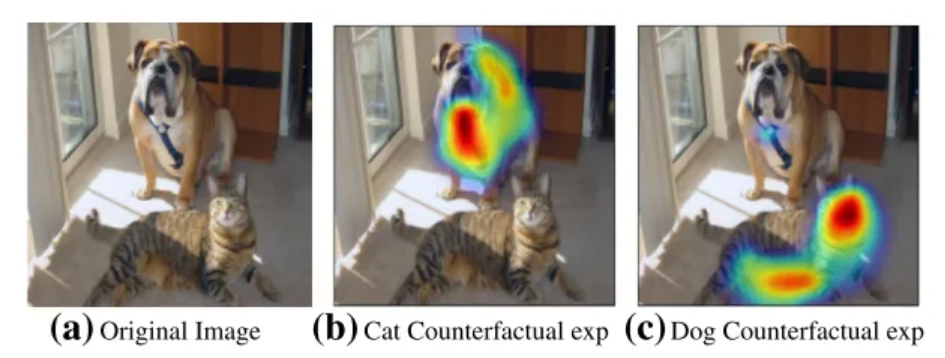

---

### Grad-CAM 使用範例：ResNet50 模型

這個範例使用預訓練的 ResNet50 模型，該模型專門用來進行圖像分類任務。你可以上傳任何常見類型的圖片，如狗、貓、車輛、建築物等，ResNet50 會將圖像分類為 1000 種不同的類別（根據 ImageNet 數據集進行訓練）。它不是物件偵測模型，而是**圖像分類模型**，這意味著它會根據整張圖片進行分類，而不是偵測圖片中的多個物件。


### 程式碼重點

1. **ResNet50 模型**：這個模型是用於圖像分類的，輸入圖片後會將其分類為 1000 個類別中的一個（根據 ImageNet 數據集進行訓練）。
2. **Grad-CAM 原理**：在最後的卷積層捕捉梯度，這些梯度反映了每個 feature map 對輸出結果的重要性。將梯度加權應用到 feature map 上，生成 Grad-CAM 熱圖，顯示模型對圖片中哪些部分關注最多。
3. **圖片預處理**：圖片需要進行縮放和正規化處理，以符合 ResNet50 的輸入要求。
4. **熱圖可視化**：將 Grad-CAM 熱圖疊加到原始圖片上，並用 matplotlib 顯示結果。


### 適合圖片類型

由於這是基於 ResNet50 的分類模型，適合的圖像類型包括各種常見的分類圖像，如動物、車輛、建築物等。

---

**1. 取得 ImageNet 類別名稱**

首先，需要取得 ImageNet 資料集中 1000 個類別的名稱。 PyTorch 提供了這些類別名稱的對應。您可以透過以下方式取得：

這樣，idx2label 就是一個列表，包含了 1000 個類別的名稱，索引對應於模型輸出的類別索引。

---

In [2]:
import json
from urllib import request

# Load the imagenet class index
url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
class_idx = json.loads(request.urlopen(url).read())
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

### **解釋調整原始圖像大小的代碼**

為了防止內存不足，對原始圖像進行尺寸調整。以下是這段代碼的詳細解釋：

```python
# 為了防止內存不足，調整原始圖像大小（可選）
max_dim = 512
if max(img.size) > max_dim:
    scale = max_dim / max(img.size)
    new_size = (int(img.size[0] * scale), int(img.size[1] * scale))
    img = img.resize(new_size)
    print(f"原始圖像已調整為 {new_size} 以防止內存不足。")
```

**逐行解釋：**

1. **設置最大尺寸限制：**

   ```python
   max_dim = 512
   ```

   - 設定圖像的最大尺寸為 512 像素。這個值可以根據您的內存情況進行調整。

2. **檢查圖像的最大邊是否超過限制：**

   ```python
   if max(img.size) > max_dim:
   ```

   - `img.size` 返回一個元組 `(寬度, 高度)`。
   - `max(img.size)` 獲取圖像寬度和高度中的較大值。
   - 如果較大值超過了 `max_dim`，就需要對圖像進行縮放。

3. **計算縮放比例：**

   ```python
   scale = max_dim / max(img.size)
   ```

   - 計算縮放比例 `scale`，使得圖像的最大邊縮放到 `max_dim`，同時保持寬高比不變。
   - 例如，如果圖像的最大邊為 1024 像素，`scale = 512 / 1024 = 0.5`。

4. **計算新的圖像尺寸：**

   ```python
   new_size = (int(img.size[0] * scale), int(img.size[1] * scale))
   ```

   - 將圖像的寬度和高度分別乘以縮放比例 `scale`，得到新的尺寸。
   - 使用 `int()` 將結果轉換為整數，因為圖像尺寸必須是整數。
   - 繼續以上的例子，假設原始尺寸為 `(1024, 768)`：
     - 新的寬度：`1024 * 0.5 = 512`
     - 新的高度：`768 * 0.5 = 384`
     - 新尺寸為 `(512, 384)`。

5. **調整圖像尺寸：**

   ```python
   img = img.resize(new_size)
   ```

   - 使用 PIL 庫的 `resize()` 方法，將圖像調整為新的尺寸。

6. **輸出調整後的圖像尺寸：**

   ```python
   print(f"原始圖像已調整為 {new_size} 以防止內存不足。")
   ```

   - 打印出新的圖像尺寸，方便您了解調整的結果。

**總結：**

- **目的**：為了防止在處理高分辨率圖像時占用過多內存，導致內核崩潰或程序運行緩慢。
- **如何縮小**：將圖像的最大邊縮小到 `max_dim`，同時按比例縮小另一個邊，保持圖像的寬高比不變。
- **縮小了幾倍**：縮小的倍數由 `scale` 決定，`scale` 等於 `max_dim` 除以原始圖像的最大邊長度。

**示例：**

假設原始圖像的尺寸為 `(4000, 3000)` 像素：

- `max(img.size)` 為 `4000`。
- `scale = 512 / 4000 = 0.128`。
- 新的尺寸為：
  - 寬度：`4000 * 0.128 ≈ 512`
  - 高度：`3000 * 0.128 ≈ 384`
- 圖像被縮小了約 `1/7.8` 倍。

---

### **補充說明**

- **為什麼需要調整圖像大小？**

  - 處理高分辨率圖像會佔用大量的內存，尤其是在深度學習模型中，圖像經過多層卷積和反向傳播，內存消耗會更大。
  - 為了防止內存不足導致程序崩潰，通常會將圖像縮小到合理的尺寸。

- **max_dim 的選擇**

  - `max_dim` 的值可以根據您的計算資源進行調整。如果內存充足，您可以設置更大的值，如 `1024`。
  - 需要權衡圖像細節的保留和內存消耗之間的關係。

- **保持寬高比**

  - 在調整圖像大小時，保持寬高比不變可以防止圖像變形，保持原始圖像的視覺特徵。

- **調整後的圖像用於可視化**

  - 縮小後的圖像主要用於生成 Grad-CAM 熱力圖的疊加顯示，便於您觀察模型關注的區域。
  - 模型輸入的圖像已經在預處理階段調整為 `(224, 224)`，不受此處調整的影響。

---

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
from torchvision import models, transforms
import torch.nn.functional as F
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import json
from urllib import request


# 定義全域變數來保存梯度和特徵圖
gradients = None
features = None

# 定義鉤子函數來捕捉梯度
def save_gradient(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0] # 捕捉到的梯度是一個元組

# 定義鉤子函數來捕捉特徵圖
def save_feature_map(module, input, output):
    global features
    features = output # 捕捉到的特徵圖是一個元組

# 定義圖像預處理函數
def preprocess_image(img_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # 調整到模型輸入尺寸
        transforms.ToTensor(), # 轉換為 Tensor
        # 正規化圖像，這裡的參數是使用 ImageNet 的平均值和標準差
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225]),
    ])
    img = Image.open(img_path).convert('RGB') # 讀取圖像
    img_tensor = preprocess(img).unsqueeze(0) # 添加 batch 維度
    return img_tensor, img # 返回預處理後的 Tensor 和原始圖像

# 載入 ResNet50 預訓練模型
model = models.resnet50(pretrained=True)
model.eval()

# 選擇運行設備（CPU 或 GPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 在最後的捲積層上註冊鉤子函數
final_conv_layer = model.layer4[2].conv3

# 根據 PyTorch 版本選擇合適的鉤子函數
# 如果您的 PyTorch 版本 >= 1.8，使用 register_full_backward_hook
# 否則，使用 register_backward_hook
if torch.__version__ >= '1.8':
    final_conv_layer.register_forward_hook(save_feature_map)
    final_conv_layer.register_full_backward_hook(save_gradient)
else:
    final_conv_layer.register_forward_hook(save_feature_map)
    final_conv_layer.register_backward_hook(save_gradient)

# 圖像預處理
input_tensor, img = preprocess_image(r"D:\Learning_Python\30-Day_AI_Deep_Learning_Plan\day25_test3.jpeg")
input_tensor = input_tensor.to(device)

# 為了防止記憶體不足，調整原始影像大小（可選）
max_dim = 1024
if max(img.size) > max_dim:
    scale = max_dim / max(img.size)
    new_size = (int(img.size[0] * scale), int(img.size[1] * scale))
    img = img.resize(new_size)
    print(f"原始影像已調整為 {new_size} 以防止記憶體不足。")

# 前向傳播
try:
    output = model(input_tensor) # 輸出形狀為 (1, 1000)
    pred_probs = torch.nn.functional.softmax(output[0], dim=0) # 轉換為概率

    # 取得 Top-5 預測
    topk_probs, topk_indices = torch.topk(pred_probs, 5) # 取得前 5 個概率最大的類別
    topk_probs = topk_probs.cpu().detach().numpy() # 轉換為 NumPy 陣列
    topk_indices = topk_indices.cpu().detach().numpy() # 轉換為 NumPy 陣列

    # 輸出 Top-1 預測（已存在）
    pred_class = topk_indices[0] # 取得預測類別索引
    pred_label = idx2label[pred_class] # 取得預測類別名稱
    print(f"模型預測的類別索引為：{pred_class}")
    print(f"預測類別: {pred_label}, 概率: {topk_probs[0]*100:.2f}%")

    # 輸出 Top-5 預測
    print("\n模型 Top-5 預測類別及機率：")
    for i in range(5):
        class_idx = topk_indices[i] # 取得類別索引
        class_prob = topk_probs[i] * 100 # 轉換為百分比
        class_label = idx2label[class_idx]  # 取得類別名稱
        print(f"  類別索引: {class_idx}, 類別名稱: {class_label}, 概率: {class_prob:.3f}%")
    model.zero_grad() # 清除梯度
    output[0, pred_class].backward() # 反向傳播

except Exception as e:
    print(f"模型推理時出錯: {e}")

# 檢查梯度和特徵圖是否捕獲
if gradients is None or features is None:
    print("梯度或特徵圖為 None，請檢查鉤子函數和模型層。")
    exit()

# 取得梯度和特徵圖
gradients = gradients.detach().cpu().numpy()
features = features.detach().cpu().numpy()

# 取得特徵圖的形狀
batch_size, channels, height, width = features.shape

# 計算權重：在高度和寬度維度上進行全域平均池化
weights = np.mean(gradients, axis=(2, 3))  # 形狀為 (batch_size, channels)

# 計算 Grad-CAM
grad_cam = np.zeros((height, width), dtype=np.float32)

for i, w in enumerate(weights[0]):
    grad_cam += w * features[0, i, :, :]

# 使用 ReLU 去除負值
grad_cam = np.maximum(grad_cam, 0)

# 調整 grad_cam 的大小與原始影像匹配
grad_cam = cv2.resize(grad_cam, (img.width, img.height))

# 標準化
grad_cam = (grad_cam - grad_cam.min()) / (grad_cam.max() - grad_cam.min() + 1e-8)

# 轉換為 8 位元整數
grad_cam = np.uint8(255 * grad_cam)

# 顯示 grad_cam 的形狀和資料類型
print(f"grad_cam shape: {grad_cam.shape}, dtype: {grad_cam.dtype}")

# 產生熱圖並疊加在原始影像上
heatmap = cv2.applyColorMap(grad_cam, cv2.COLORMAP_JET) # 產生熱圖
heatmap = np.float32(heatmap) / 255 # 轉換為浮點數

# 確保影像大小匹配
img = img.resize((grad_cam.shape[1], grad_cam.shape[0])) # 調整大小
img_np = np.array(img).astype(np.float32) / 255 # 轉換為浮點數

# 疊加熱圖
superimposed_img = heatmap * 0.4 + img_np # 透明度為 0.4
superimposed_img = np.clip(superimposed_img, 0, 1) # 限制在 0 和 1 之間

# 顯示原始影像和 Grad-CAM
plt.figure(figsize=(10, 5))

# 顯示原始影像
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original image")
plt.axis('off')

# 顯示 Grad-CAM
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title(f"Grad-CAM:{pred_label}")
plt.axis('off')

plt.show()

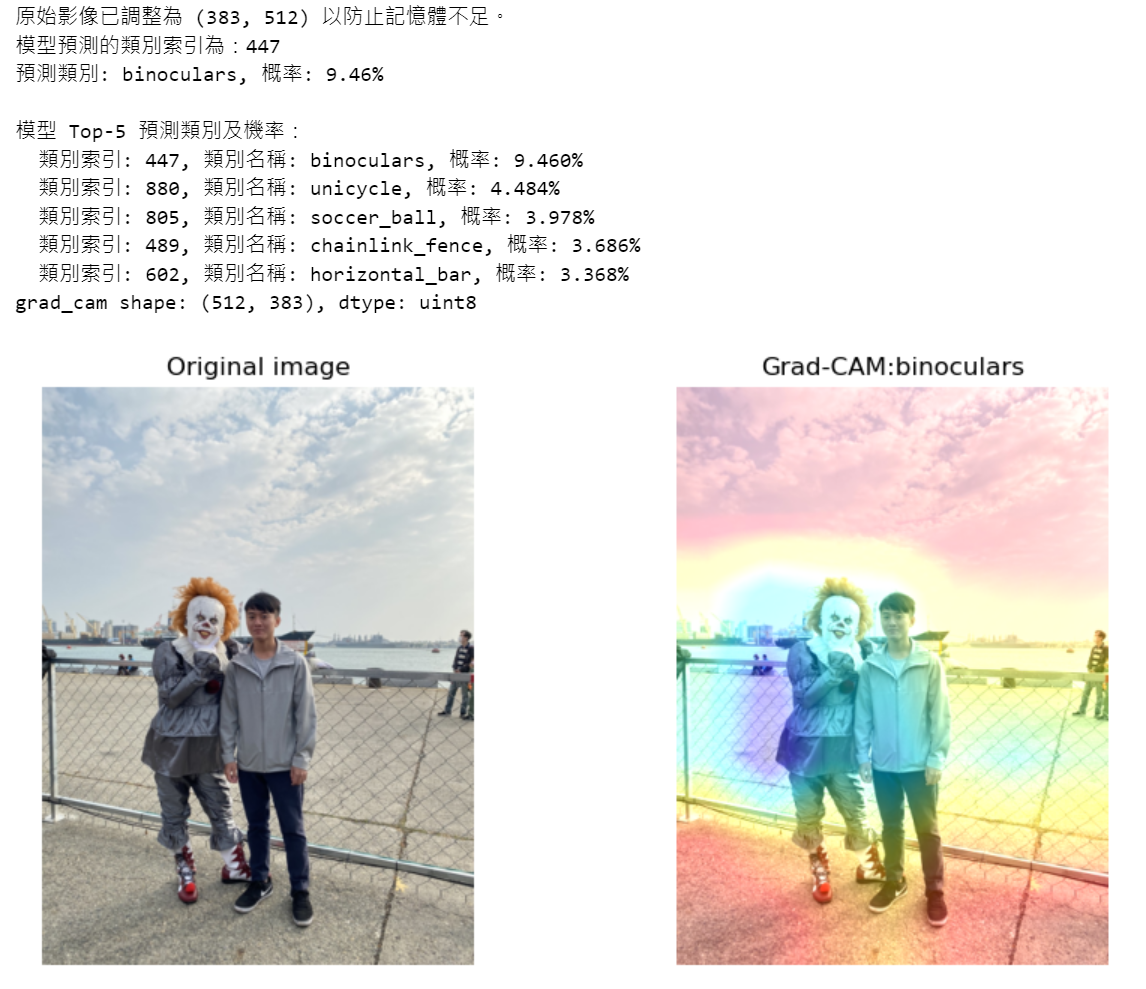

在圖像中，模型的預測類別是「binoculars」（望遠鏡），但從熱圖上看，紅色區域分布於背景中的天空和人物周圍。這可能表示模型的預測有些錯誤，或者它關注的區域與「望遠鏡」這個類別不一致，模型可能在判斷時混淆了對象。

---

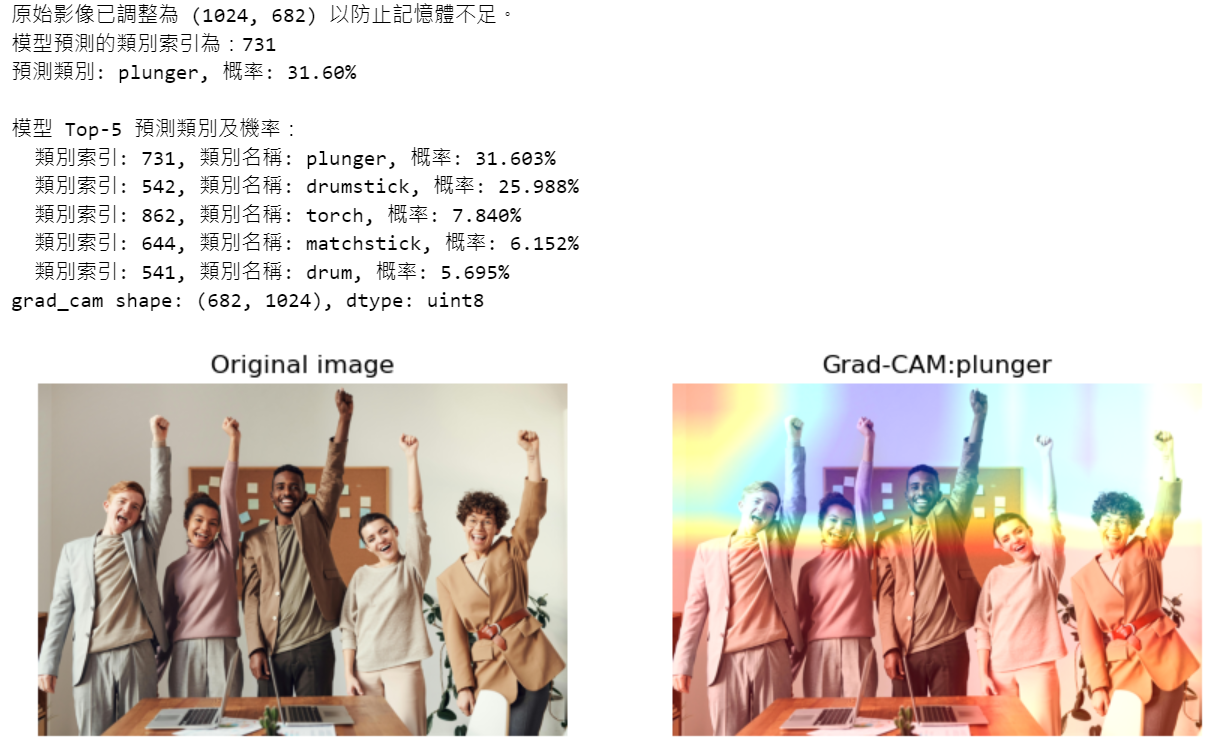

---

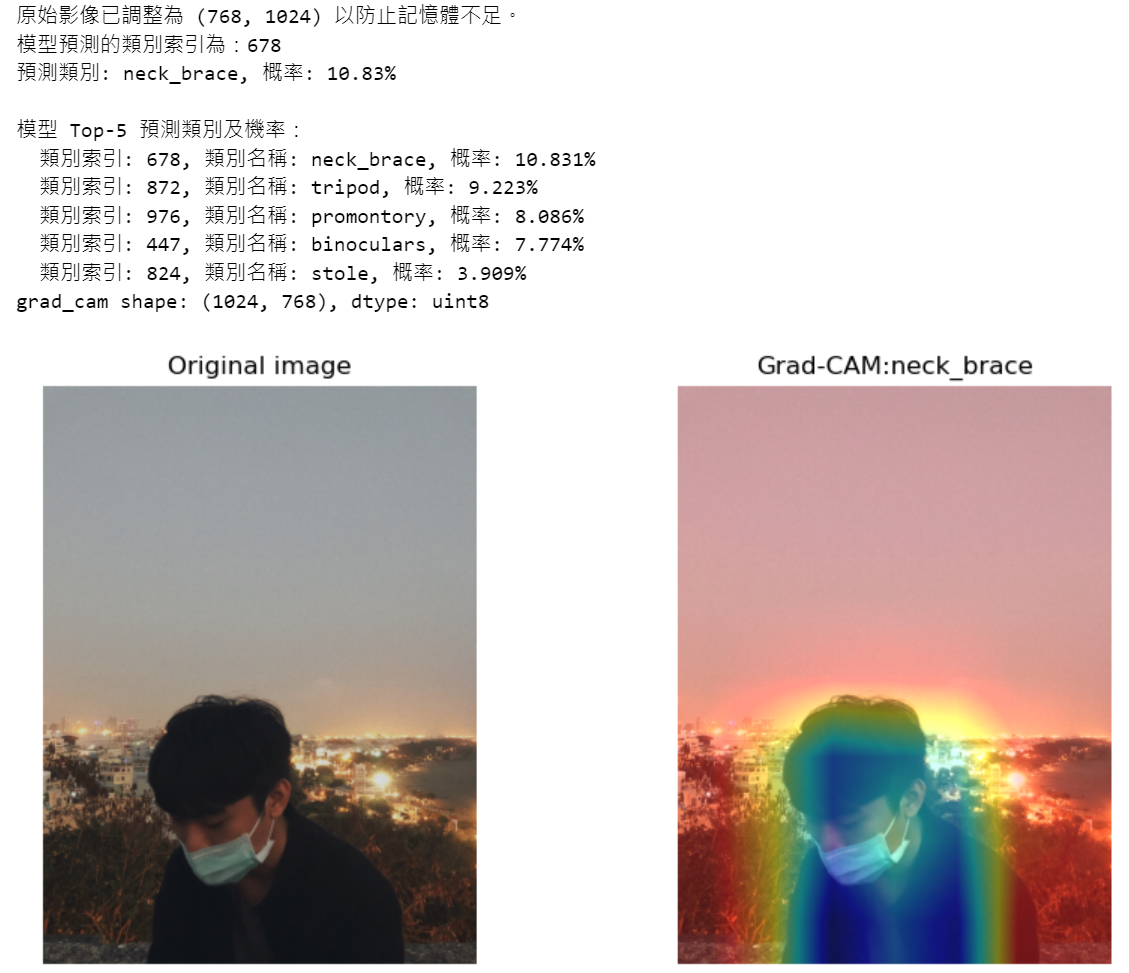

---